In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_json("News_Category_Dataset_v3.json", lines=True)
df.drop(columns=["short_description"], inplace=True)
df.head()

,link,headline,category,authors,date
0,https://www.huffpost.com/entry/minimum-wage-in...,Millions To See Pay Hikes In 2019 As Minimum W...,U.S. NEWS,Amy Russo,2018-12-31
1,https://www.huffpost.com/entry/california-wome...,'Overwhelmingly White' California Women's Marc...,U.S. NEWS,Amy Russo,2018-12-31
2,https://www.huffpost.com/entry/markets-right-n...,U.S. Stocks Suffer Worst Year Since 2008 Finan...,BUSINESS,"ALEX VEIGA, AP",2018-12-31
3,https://www.huffpost.com/entry/louisiana-polic...,Louisiana Police Sucker Media With Offer To 'T...,WEIRD NEWS,David Lohr,2018-12-31
4,https://www.huffpost.com/entry/serena-williams...,Roger Federer Will Face Off With Serena Willia...,SPORTS,Curtis M. Wong,2018-12-31


In [82]:
df["date"] = pd.to_datetime(df["date"])
df_train = df[df["date"] < "2015-06-23"]
df_train.head()

,link,headline,category,authors,date
88732,https://www.huffingtonpost.com/entry/post_9608...,"A ""Peace Community"" Tries Nonviolent Resistanc...",POLITICS,"Nikki Drake, ContributorInternational Accompan...",2015-06-22
88733,https://www.huffingtonpost.com/entry/milan-kun...,How To Read A Bad Book By A Great Author,ARTS,Colton Valentine,2015-06-22
88734,https://www.huffingtonpost.com/entry/the-inter...,"The Intersection of Race, Class and the Consti...",POLITICS,"Sheena C. Howard, ContributorAssociate Profess...",2015-06-22
88735,https://www.huffingtonpost.com/entry/giant-sou...,This Is How To Make A Giant Sour Gummy Worm,TASTE,Julie R. Thomson,2015-06-22
88736,https://www.huffingtonpost.com/entry/how-to-de...,Here's How to Decide if Grad School is Right f...,EDUCATION,"Brianna McGurran, ContributorStaff Writer, Ner...",2015-06-22


In [83]:
politics_articles = df_train[df_train["category"] == "POLITICS"]
poli_count = politics_articles.groupby("date").size().reset_index(name="Number of Articles")
poli_count

,date,Number of Articles
0,2014-04-18,9
1,2014-04-19,12
2,2014-04-20,13
3,2014-04-21,9
4,2014-04-22,6
...,...,...
426,2015-06-18,17
427,2015-06-19,15
428,2015-06-20,14
429,2015-06-21,18


In [84]:
X = pd.to_numeric(poli_count["date"]).values.reshape(-1,1)
Y = poli_count["Number of Articles"].values

In [85]:
model1 = LinearRegression()
model1.fit(X,Y)
y_pred = model1.predict(X)

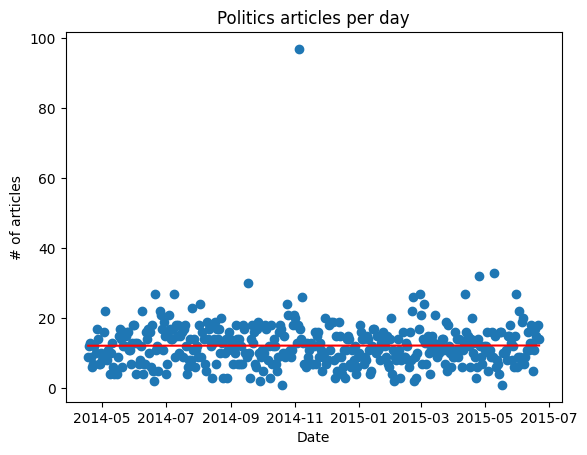

In [86]:
plt.figure()
plt.scatter(poli_count["date"], poli_count["Number of Articles"], label="Training Data, Before Verizon")
plt.plot(poli_count["date"], y_pred, color="red", label="Linear Regression")
plt.title("Politics articles per day")
plt.xlabel("Date")
plt.ylabel("# of articles")
plt.show()

In [87]:
df_test = df[df["date"] > "2015-06-23"]
df_test.head()

,link,headline,category,authors,date
0,https://www.huffpost.com/entry/minimum-wage-in...,Millions To See Pay Hikes In 2019 As Minimum W...,U.S. NEWS,Amy Russo,2018-12-31
1,https://www.huffpost.com/entry/california-wome...,'Overwhelmingly White' California Women's Marc...,U.S. NEWS,Amy Russo,2018-12-31
2,https://www.huffpost.com/entry/markets-right-n...,U.S. Stocks Suffer Worst Year Since 2008 Finan...,BUSINESS,"ALEX VEIGA, AP",2018-12-31
3,https://www.huffpost.com/entry/louisiana-polic...,Louisiana Police Sucker Media With Offer To 'T...,WEIRD NEWS,David Lohr,2018-12-31
4,https://www.huffpost.com/entry/serena-williams...,Roger Federer Will Face Off With Serena Willia...,SPORTS,Curtis M. Wong,2018-12-31


In [88]:
politics_articles_test = df_test[df_test["category"] == "POLITICS"]
poli_count_test = politics_articles_test.groupby("date").size().reset_index(name="Number of Articles")
poli_count_test

,date,Number of Articles
0,2015-06-24,11
1,2015-06-25,13
2,2015-06-26,14
3,2015-06-27,17
4,2015-06-28,16
...,...,...
1207,2018-12-26,1
1208,2018-12-27,1
1209,2018-12-28,4
1210,2018-12-29,3


In [89]:
X2 = pd.to_numeric(poli_count_test["date"]).values.reshape(-1,1)
Y2 = poli_count_test["Number of Articles"].values

In [90]:
model2 = LinearRegression()
model2.fit(X2,Y2)
y2_pred = model2.predict(X2)

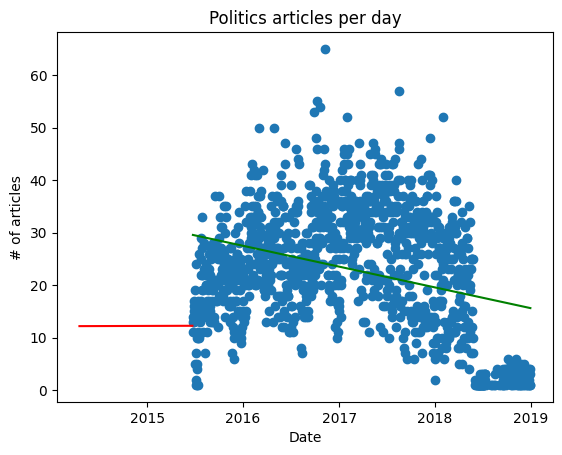

In [91]:
plt.figure()
plt.scatter(poli_count_test["date"], poli_count_test["Number of Articles"], label="Training Data, 2014-2015")
plt.plot(poli_count["date"], y_pred, color="red", label="Linear Regression")
plt.plot(poli_count_test["date"], y2_pred, color="green", label="Linear Regression 2")
plt.title("Politics articles per day")
plt.xlabel("Date")
plt.ylabel("# of articles")
plt.show()

In [92]:
accuracy = r2_score(Y2,y2_pred)
accuracy

0.10874135421754583

In [93]:
sports_articles = df_train[df_train["category"] == "SPORTS"]
sport_count = sports_articles.groupby("date").size().reset_index(name="Number of Articles")
sport_count

,date,Number of Articles
0,2012-01-28,4
1,2012-01-29,5
2,2012-02-18,5
3,2012-02-19,3
4,2012-02-25,1
...,...,...
483,2015-06-18,3
484,2015-06-19,3
485,2015-06-20,3
486,2015-06-21,4


In [94]:
X3 = pd.to_numeric(sport_count["date"]).values.reshape(-1,1)
Y3 = sport_count["Number of Articles"].values
Y3.shape

(488,)

In [95]:
model3 = LinearRegression()
model3.fit(X3,Y3)
y3_pred = model3.predict(X3)

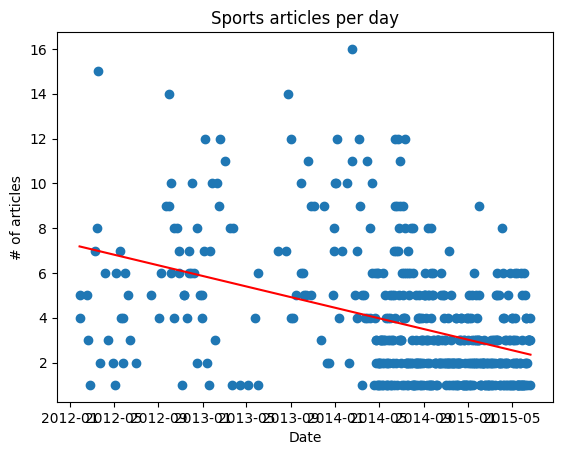

In [96]:
plt.figure()
plt.scatter(sport_count["date"], sport_count["Number of Articles"], label="Training Data, Before Verizon")
plt.plot(sport_count["date"], y3_pred, color="red", label="Linear Regression")
plt.title("Sports articles per day")
plt.xlabel("Date")
plt.ylabel("# of articles")
plt.show()

In [97]:
sports_articles_test = df_test[df_test["category"] == "SPORTS"]
sports_count_test = sports_articles_test.groupby("date").size().reset_index(name="Number of Articles")
sports_count_test

,date,Number of Articles
0,2015-06-24,2
1,2015-06-26,5
2,2015-06-27,3
3,2015-06-28,3
4,2015-06-30,2
...,...,...
845,2018-11-24,1
846,2018-11-29,2
847,2018-12-15,1
848,2018-12-17,1


In [98]:
X4 = pd.to_numeric(sports_count_test["date"]).values.reshape(-1,1)
Y4 = sports_count_test["Number of Articles"].values

In [99]:
model4 = LinearRegression()
model4.fit(X4,Y4)
y4_pred = model4.predict(X4)

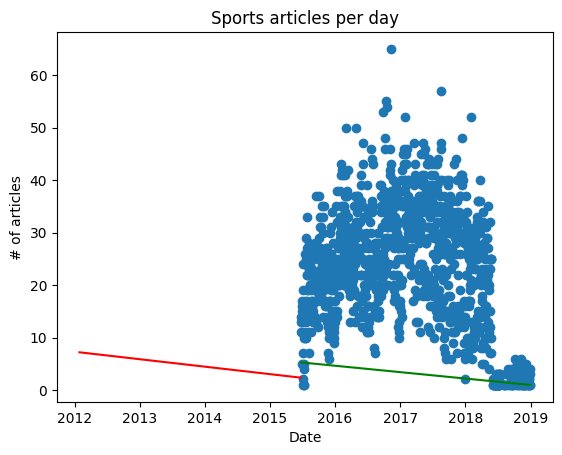

In [100]:
plt.figure()
plt.scatter(poli_count_test["date"], poli_count_test["Number of Articles"], label="Training Data, Before Verizon")
plt.plot(sport_count["date"], y3_pred, color="red", label="Linear Regression")
plt.plot(sports_count_test["date"], y4_pred, color="green", label="Linear Regression 2")
plt.title("Sports articles per day")
plt.xlabel("Date")
plt.ylabel("# of articles")
plt.show()

In [101]:
enter_articles = df_train[df_train["category"] == "ENTERTAINMENT"]
enter_count = enter_articles.groupby("date").size().reset_index(name="Number of Articles")
enter_count

,date,Number of Articles
0,2012-01-28,2
1,2012-01-29,3
2,2012-02-04,2
3,2012-02-05,2
4,2012-02-11,8
...,...,...
669,2015-06-18,4
670,2015-06-19,7
671,2015-06-20,13
672,2015-06-21,7


In [102]:
X5 = pd.to_numeric(enter_count["date"]).values.reshape(-1,1)
Y5 = enter_count["Number of Articles"].values

In [103]:
model5 = LinearRegression()
model5.fit(X5,Y5)
y5_pred = model5.predict(X5)

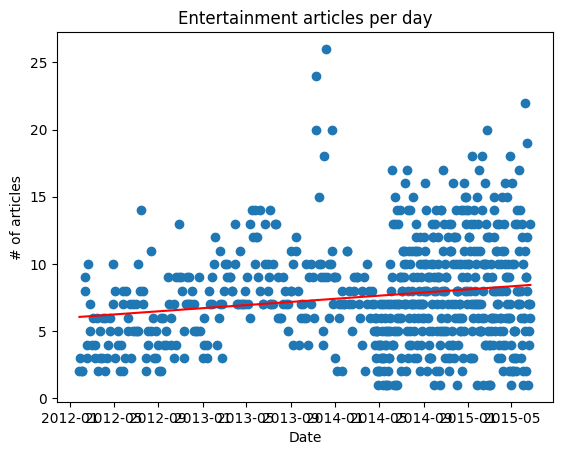

In [104]:
plt.figure()
plt.scatter(enter_count["date"], enter_count["Number of Articles"], label="Training Data, 2014-2015")
plt.plot(enter_count["date"], y5_pred, color="red", label="Linear Regression")
plt.title("Entertainment articles per day")
plt.xlabel("Date")
plt.ylabel("# of articles")
plt.show()

In [105]:
enter_articles_test = df_test[df_test["category"] == "ENTERTAINMENT"]
enter_count_test = enter_articles_test.groupby("date").size().reset_index(name="Number of Articles")
enter_count_test

,date,Number of Articles
0,2015-06-24,7
1,2015-06-25,2
2,2015-06-26,7
3,2015-06-27,22
4,2015-06-28,18
...,...,...
1153,2018-12-26,4
1154,2018-12-27,2
1155,2018-12-28,1
1156,2018-12-29,1


In [106]:
X6 = pd.to_numeric(enter_count_test["date"]).values.reshape(-1,1)
Y6 = enter_count_test["Number of Articles"].values

In [107]:
model6 = LinearRegression()
model6.fit(X6,Y6)
y6_pred = model6.predict(X6)

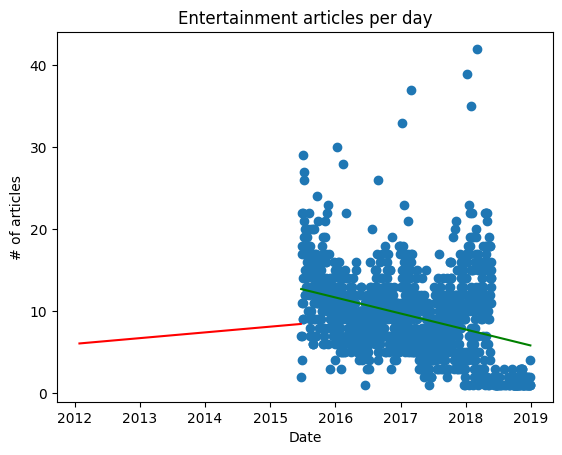

In [108]:
plt.figure()
plt.scatter(enter_count_test["date"], enter_count_test["Number of Articles"], label="Training Data, Before Verizon")
plt.plot(enter_count["date"], y5_pred, color="red", label="Linear Regression")
plt.plot(enter_count_test["date"], y6_pred, color="green", label="Linear Regression 2")
plt.title("Entertainment articles per day")
plt.xlabel("Date")
plt.ylabel("# of articles")
plt.show()